In [1]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, TensorDataset
from torch.nn import functional as F
import torchvision
from torchvision import datasets,transforms
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import random
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

In [2]:
random.seed=318
data_dir = 'testdata' 
#Applying Transformation
test_transforms = transforms.Compose([transforms.Resize(255),
                                      transforms.RandomResizedCrop(128),
                                      transforms.ToTensor(),
                                      transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                              std=[0.229, 0.224, 0.225])])   

batch_size = 32

test_data = datasets.ImageFolder(data_dir, transform=test_transforms)                                       
#Data Loading
testloader = torch.utils.data.DataLoader(test_data, batch_size = batch_size, shuffle=True, num_workers=2)
classes = ('cherry', 'strawberry', 'tomato')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


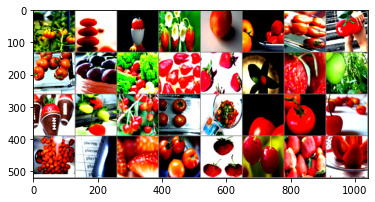

tomato tomato tomato strawberry tomato strawberry tomato cherry tomato cherry tomato strawberry strawberry strawberry strawberry tomato strawberry strawberry cherry tomato strawberry tomato tomato cherry tomato cherry strawberry tomato strawberry cherry strawberry tomato


In [3]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(testloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

In [4]:
import torch.nn as nn # nn module contains all the layers 
import torch.nn.functional as F # same as nn, but a little different 

# Define a convolution neural network
class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        
        self.conv1 = nn.Conv2d(3, 16, 5)
        # Max pooling over a (2, 2) window
        self.pool = nn.MaxPool2d(2, 2)
        
        self.conv2 = nn.Conv2d(16, 32, 5) 
        
        
        self.conv3 = nn.Conv2d(32, 64, 5) 
        
        self.fc1 = nn.Linear(64 * 12 * 12, 180)# 5x5 from image dimension
        self.fc2 = nn.Linear(180, 84)
        self.fc3 = nn.Linear(84, 3)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
# Instantiate a neural network model 
net = Network()

In [5]:
PATH = 'model.pth'
net = Network()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [6]:
outputs = net(images)

In [7]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:  tomato tomato tomato tomato


In [8]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}
correct = 0
total = 0

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data    
        outputs = net(images)    
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
                correct +=1
            total_pred[classes[label]] += 1
            total += 1
# print total accuracy
print('Accuracy of the network on the test images: %d %%' % (
    100 * correct / total))  
 # print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print("Accuracy for class {:5s} is: {:.1f} %".format(classname, 
                                                   accuracy))

Accuracy of the network on the test images: 75 %
Accuracy for class cherry is: 77.7 %
Accuracy for class strawberry is: 68.9 %
Accuracy for class tomato is: 80.8 %
